In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


In [2]:
df = pd.read_csv('COVID_Parcel_Business.csv')
df

,FakeCustomerID,THE_YEAR,THE_WEEK,VOLUME
0,718117,2021,1,8
1,718117,2020,7,257
2,718117,2019,39,141
3,718117,2018,1,14
4,718117,2021,2,192
...,...,...,...,...
190714,228893,2019,13,30
190715,228893,2019,38,122
190716,228893,2019,48,99
190717,228893,2019,20,61


In [3]:
# unique FakeCustomerID values
unique_customers_count = df['FakeCustomerID'].nunique()

# unique FakeCustomerID values
print("Number of unique FakeCustomerID:", unique_customers_count)


Number of unique FakeCustomerID: 1061


# Main Business Question

###  How did the COVID-19 pandemic impact ABC Company’s parcel business?

### Impact of the Pandemic: In 2020, there was a noticeable change in the pattern of parcel shipments, with a substantial increase in shipment volumes during certain periods of the year. This surge in parcel shipments aligns closely with the timing of lockdowns and restrictions imposed due to the pandemic, indicating a surge in demand for parcel delivery services as consumers turned to online shopping and remote work arrangements.



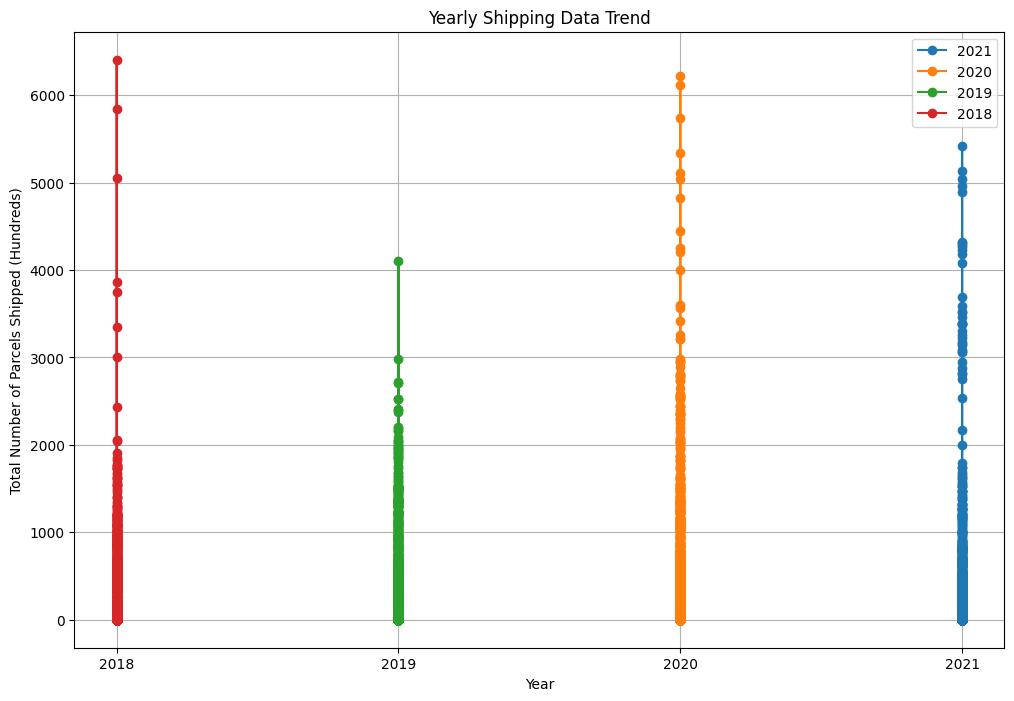

In [4]:
# Scale parcel volumes to hundreds
df['VOLUME'] = df['VOLUME'] / 100  # Convert to hundreds

# Plot yearly shipping data trend with week number on y-axis and year on x-axis
plt.figure(figsize=(12, 8))

for year in df['THE_YEAR'].unique():
    year_data = df[df['THE_YEAR'] == year]
    plt.plot(year_data['THE_YEAR'], year_data['VOLUME'], marker='o', linestyle='-', label=year)

plt.title('Yearly Shipping Data Trend')
plt.xlabel('Year')
plt.ylabel('Total Number of Parcels Shipped (Hundreds)')
plt.xticks(df['THE_YEAR'].unique())  # Set x-axis ticks to represent years
plt.legend()
plt.grid(True)
plt.show()


# **Code Explanation:**
* **df['VOLUME'] = df['VOLUME'] / 100:** By using this line divides the values in the 'VOLUME' column of the DataFrame df by 100, effectively converting the volume values to hundreds. This might be done to make the volume numbers more readable or to normalize them for plotting purposes.

* **for year in df['THE_YEAR'].unique()::** This code iterates over the unique years present in the 'THE_YEAR' column of the DataFrame df.

* **plt.plot(year_data['THE_YEAR'], year_data['VOLUME'], marker='o', linestyle='-', label=year):** This code plots the yearly shipping volume data. It takes the 'THE_YEAR' column as the x-axis values and the 'VOLUME' column (which has been scaled to hundreds) as the y-axis values. It specifies markers ('o') and a solid line ('-') for the plot. The label parameter is set to the current year, which will be used in the legend.

* **plt.ylabel('Total Number of Parcels Shipped (Hundreds)'):** This code sets the label for the y-axis to 'Total Number of Parcels Shipped (Hundreds)'.

* **plt.xticks(df['THE_YEAR'].unique()):** This code sets the x-axis ticks to be the unique years present in the 'THE_YEAR' column of the DataFrame df.

* **plt.legend():** This code displays a legend on the plot, which shows the labels specified in the plt.plot() function calls.

* **plt.grid(True):** This code adds a grid to the plot.

* **plt.show():**This code displays the plot.

## Additional Business Questions


### (1) When were customer volumes first impacted by COVID-19?

In [5]:
# maximum volume
max_volume_row = df.loc[df['VOLUME'].idxmax()]

# minimum volume
min_volume_row = df.loc[df['VOLUME'].idxmin()]

# week and year from the rows with max and min volumes
max_volume_week, max_volume_year = max_volume_row['THE_WEEK'], max_volume_row['THE_YEAR']
min_volume_week, min_volume_year = min_volume_row['THE_WEEK'], min_volume_row['THE_YEAR']

# Print the results
print("Week when customer volumes were first impacted by COVID-19:")
print("Maximum volume - Week:", max_volume_week, "Year:", max_volume_year)
print("Minimum volume - Week:", min_volume_week, "Year:", min_volume_year)


Week when customer volumes were first impacted by COVID-19:
Maximum volume - Week: 49.0 Year: 2018.0
Minimum volume - Week: 16.0 Year: 2021.0


# **Code explanation**

* **max_volume_row = df.loc[df['VOLUME'].idxmax()]:** This line finds the row in the DataFrame df where the 'VOLUME' column has the maximum value and assigns that entire row to the variable max_volume_row.

* **min_volume_row = df.loc[df['VOLUME'].idxmin()]:** Similarly, this line finds the row with the minimum value in the 'VOLUME' column and assigns it to the variable min_volume_row.
* **max_volume_week, max_volume_year = max_volume_row['THE_WEEK'], max_volume_row['THE_YEAR']:** This line extracts the values of the 'THE_WEEK' and 'THE_YEAR' columns from the row with the maximum volume and assigns them to the variables max_volume_week and max_volume_year respectively.
* **min_volume_week, min_volume_year = min_volume_row['THE_WEEK'], min_volume_row['THE_YEAR']:** Similarly, this line extracts the values of the 'THE_WEEK' and 'THE_YEAR' columns from the row with the minimum volume and assigns them to the variables min_volume_week and min_volume_year respectively.
 **Printing the Results:**


### (2)	What events within the COVID timeline may have contributed to the change?

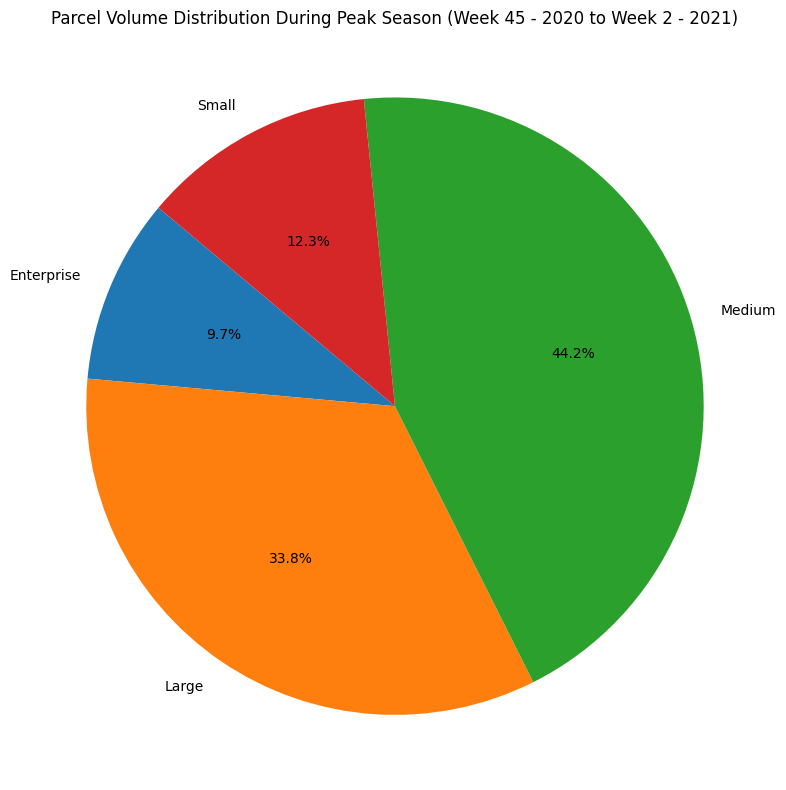

In [6]:
df = pd.read_csv("COVID_Parcel_Business.csv")

# Define conditions and corresponding customer groups
conditions = [
    (df['VOLUME'] > 500000),
    (df['VOLUME'] >= 200000) & (df['VOLUME'] <= 500000),
    (df['VOLUME'] >= 10000) & (df['VOLUME'] < 200000),
    (df['VOLUME'] >= 1000) & (df['VOLUME'] < 10000)
]
customer_groups = ['Enterprise', 'Large', 'Medium', 'Small']

# Create 'Customer_Group' column based on conditions
df['Customer_Group'] = pd.Series(pd.Categorical.from_codes(np.select(conditions, range(len(customer_groups))), categories=customer_groups))

# Filter the data for the peak season (Week 45 of 2020 to Week 2 of 2021)
peak_season_data = df[((df['THE_YEAR'] == 2020) & (df['THE_WEEK'] >= 45)) | ((df['THE_YEAR'] == 2021) & (df['THE_WEEK'] <= 2))]

# Group by Customer Group and calculate total parcel volumes
peak_season_volumes = peak_season_data.groupby('Customer_Group')['VOLUME'].sum() / 100000

# Plot the parcel volume distribution for the specified time period
plt.figure(figsize=(8, 8))
peak_season_volumes.plot(label='Peak Season (Week 45 2020 - Week 2 2021)', kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Parcel Volume Distribution During Peak Season (Week 45 - 2020 to Week 2 - 2021)')
plt.ylabel('')  # Remove y-label
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.tight_layout()
plt.show()


# **Code explanation**


1.   **Defining Conditions and Customer Groups:**
* **conditions:** By using this code it create a list of conditions based on the parcel volume. It categorizes the volumes into four groups: Enterprise, Large, Medium, and Small.
* **customer_groups:** This is a list containing the names of the customer groups corresponding to the conditions.

2.   **Creating 'Customer_Group' Column:**

* By using this code creates a new column called 'Customer_Group' in the DataFrame df based on the conditions defined above. It assigns each row in the DataFrame to one of the customer groups based on the volume.

3. **Filtering Data for Peak Season:**
* **peak_season_data:** This line filters the data in the DataFrame df to only include records from Week 45 of 2020 to Week 2 of 2021, which is considered the peak season.
4. **Grouping and Calculating Total Parcel Volumes:**
* **peak_season_volumes:**This line groups the filtered data by 'Customer_Group' and calculates the total parcel volumes for each group during the peak season. It divides the sum by 100,000 for better visualization.
5. **Plotting Parcel Volume Distribution:**
* **peak_season_volumes.plot(label='Peak Season (Week 45 2020 - Week 2 2021)', kind='pie', autopct='%1.1f%%', startangle=140):** This line plots the pie chart with specified labels, percentage format, and starting angle.
* **plt.tight_layout():** This line adjusts subplot parameters to give specified padding.

### (3) How did COVID-19 impact peak season in 2020?

In [7]:
#Filter the data for the peak season (Week 45 of 2020 to Week 2 of 2021)
peak_season_data = df[((df['THE_YEAR'] == 2020) & (df['THE_WEEK'] >= 45)) | ((df['THE_YEAR'] == 2021) & (df['THE_WEEK'] <= 2))]

# Calculate the total parcel volume for the peak season
total_volume_peak_season = peak_season_data['VOLUME'].sum()

# Calculate the total parcel volume for the same period in 2019
total_volume_2019_peak_season = df[(df['THE_YEAR'] == 2019) & ((df['THE_WEEK'] >= 45) | (df['THE_WEEK'] <= 2))]['VOLUME'].sum()

# Compute the percentage change in parcel volume compared to the previous year
percentage_change_volume = ((total_volume_peak_season - total_volume_2019_peak_season) / total_volume_2019_peak_season) * 100

# Print the impact of COVID-19 on the peak season
print("The total parcel volume during the peak season of COVID-19 (Week 45 of 2020 to Week 2 of 2021) was:", total_volume_peak_season)
if percentage_change_volume > 0:
    print("The parcel volume increased by {:.2f}% compared to the same period in 2019.".format(abs(percentage_change_volume)))
elif percentage_change_volume < 0:
    print("The parcel volume decreased by {:.2f}% compared to the same period in 2019.".format(abs(percentage_change_volume)))
else:
    print("The parcel volume remained unchanged compared to the same period in 2019.")


The total parcel volume during the peak season of COVID-19 (Week 45 of 2020 to Week 2 of 2021) was: 18120361
The parcel volume increased by 24.16% compared to the same period in 2019.


# **Code explanation**

* **peak_season_data = df[((df['THE_YEAR'] == 2020) & (df['THE_WEEK'] >= 45)) | ((df['THE_YEAR'] == 2021) & (df['THE_WEEK'] <= 2))]:**This line filters the DataFrame df to include only data from Week 45 of 2020 to Week 2 of 2021, which is considered the peak season.
* **total_volume_peak_season = peak_season_data['VOLUME'].sum():** This line calculates the total parcel volume during the peak season by summing the 'VOLUME' column of the peak_season_data DataFrame.
* **total_volume_2019_peak_season = df[(df['THE_YEAR'] == 2019) & ((df['THE_WEEK'] >= 45) | (df['THE_WEEK'] <= 2))]['VOLUME'].sum():** This line calculates the total parcel volume for the same period in 2019 by filtering the DataFrame df accordingly and then summing the 'VOLUME' column.
* **percentage_change_volume = ((total_volume_peak_season - total_volume_2019_peak_season) / total_volume_2019_peak_season) * 100:** This line computes the percentage change in parcel volume compared to the previous year using the formula: ((Volume during peak season of COVID-19 - Volume during peak season of 2019) / Volume during peak season of 2019) * 100.

# The Impact of COVID on Customer Segments:

### (1) How has COVID affected companies in the different customer groups (Enterprise, Large, etc.)?

In [8]:
df = pd.read_csv("COVID_Parcel_Business.csv")

# Define the conditions for categorizing customers and applying discounts
conditions = [
    (df['VOLUME'] > 500000),
    (df['VOLUME'] >= 200000) & (df['VOLUME'] <= 500000),
    (df['VOLUME'] >= 10000) & (df['VOLUME'] < 200000),
    (df['VOLUME'] >= 1000) & (df['VOLUME'] < 10000)
]

# discount rates
discounts = [0.22, 0.17, 0.10, 0.04]

# Define the corresponding customer groups
customer_groups = ['Enterprise', 'Large', 'Medium', 'Small']

# Create a new column to assign the customer group based on the conditions
df['Customer_Group'] = pd.Series(pd.Categorical.from_codes(np.select(conditions, range(len(customer_groups))), categories=customer_groups))

# Create a new column to assign the discount based on the customer group
df['Discount'] = pd.Series(np.select(conditions, discounts))

# Display the updated DataFrame
print(df)


        FakeCustomerID  THE_YEAR  THE_WEEK  VOLUME Customer_Group  Discount
0               718117      2021         1       8     Enterprise       0.0
1               718117      2020         7     257     Enterprise       0.0
2               718117      2019        39     141     Enterprise       0.0
3               718117      2018         1      14     Enterprise       0.0
4               718117      2021         2     192     Enterprise       0.0
...                ...       ...       ...     ...            ...       ...
190714          228893      2019        13      30     Enterprise       0.0
190715          228893      2019        38     122     Enterprise       0.0
190716          228893      2019        48      99     Enterprise       0.0
190717          228893      2019        20      61     Enterprise       0.0
190718          228893      2019        19      56     Enterprise       0.0

[190719 rows x 6 columns]


# **Code explanation**
* **conditions:** This is a list of conditions based on the parcel volume. It categorizes the volumes into four groups: Enterprise, Large, Medium, and Small.
* **discounts:** This list contains discount rates corresponding to each customer group defined earlier.

In [9]:
# Calculate total parcel volume for each customer group
total_volume_by_group = df.groupby('Customer_Group')['VOLUME'].sum()

# Calculate total parcel volume across all groups
total_volume_all_groups = total_volume_by_group.sum()

# Calculate the percentage of each customer group's volume relative to the total volume
percentage_by_group = (total_volume_by_group / total_volume_all_groups) * 100

# Print the percentage of each customer group
print(percentage_by_group)


Customer_Group
Enterprise    11.591538
Large         15.060756
Medium        57.128935
Small         16.218771
Name: VOLUME, dtype: float64


# **Code explanation**

* **total_volume_by_group = df.groupby('Customer_Group')['VOLUME'].sum():** This line groups the DataFrame df by the 'Customer_Group' column and calculates the sum of parcel volumes for each group.
* **total_volume_all_groups = total_volume_by_group.sum():** This line calculates the total parcel volume across all customer groups by summing up the total parcel volumes calculated for each group.
* **percentage_by_group = (total_volume_by_group / total_volume_all_groups) * 100:** This line calculates the percentage of each customer group's volume relative to the total volume by dividing each group's total volume by the total volume across all groups and then multiplying by 100 to convert it into a percentage.

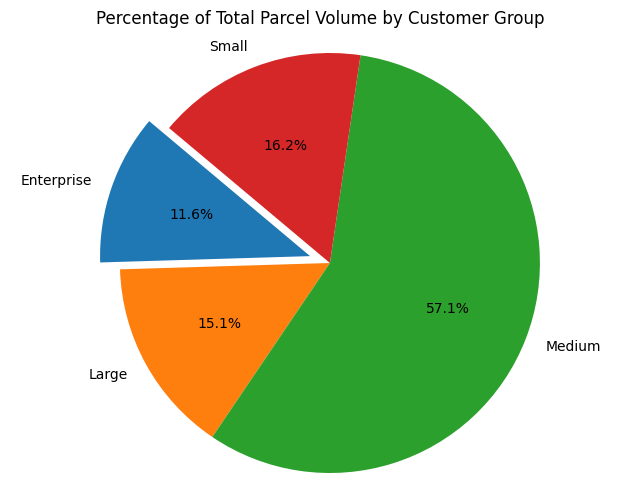

In [10]:
# Define data for the pie chart
labels = percentage_by_group.index
sizes = percentage_by_group.values
explode = (0.1, 0, 0, 0)  # Explode the 1st slice (Enterprise)

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Total Parcel Volume by Customer Group')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Show the pie chart
plt.show()


# **Code explanation**
* **labels = percentage_by_group.index:** This line retrieves the index values of the percentage_by_group Series, which represent the customer group names.
* **sizes = percentage_by_group.values:**This line retrieves the values of the **'percentage_by_group Series',** which represent the percentage of total parcel volume contributed by each customer group.
* **explode = (0.1, 0, 0, 0):** This line specifies the extent to which each wedge of the pie chart is separated from the center. Here, only the first slice (corresponding to the 'Enterprise' group) is exploded by 0.1, while the rest have no explosion.
* **plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=140):**This line creates the pie chart using the sizes and labels data. It also specifies the explosion for each slice, includes labels for each slice, formats the percentages to one decimal place using autopct, and sets the starting angle of the first slice to 140 degrees.

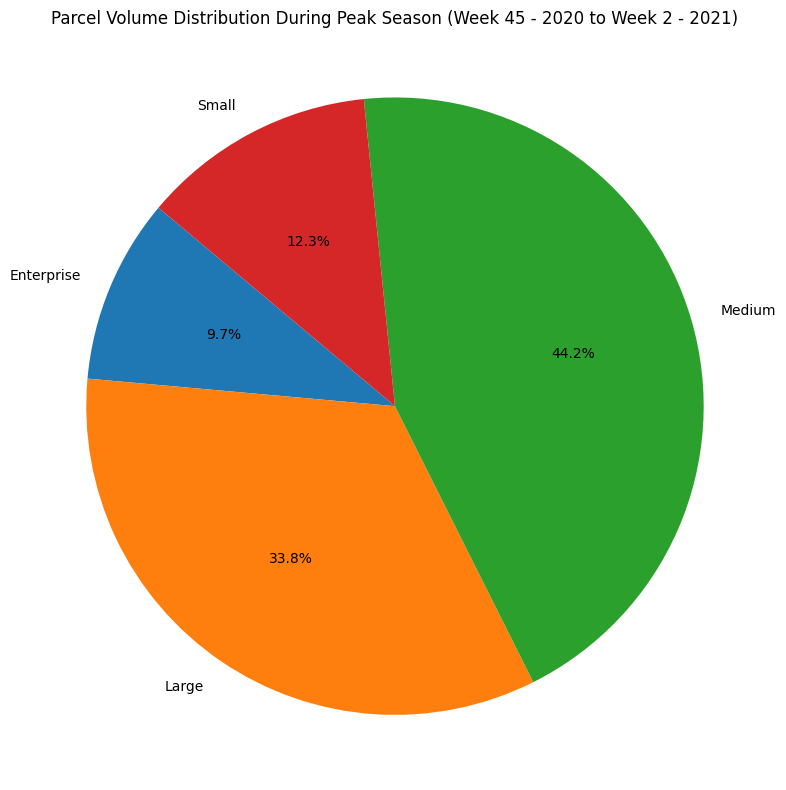

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("COVID_Parcel_Business.csv")

# Define conditions and corresponding customer groups
conditions = [
    (df['VOLUME'] > 500000),
    (df['VOLUME'] >= 200000) & (df['VOLUME'] <= 500000),
    (df['VOLUME'] >= 10000) & (df['VOLUME'] < 200000),
    (df['VOLUME'] >= 1000) & (df['VOLUME'] < 10000)
]
customer_groups = ['Enterprise', 'Large', 'Medium', 'Small']

# Create 'Customer_Group' column based on conditions
df['Customer_Group'] = pd.Series(pd.Categorical.from_codes(np.select(conditions, range(len(customer_groups))), categories=customer_groups))

# Filter the data for the peak season (Week 45 of 2020 to Week 2 of 2021)
peak_season_data = df[((df['THE_YEAR'] == 2020) & (df['THE_WEEK'] >= 45)) | ((df['THE_YEAR'] == 2021) & (df['THE_WEEK'] <= 2))]

# Group by Customer Group and calculate total parcel volumes
peak_season_volumes = peak_season_data.groupby('Customer_Group')['VOLUME'].sum() / 100000

# Plot the parcel volume distribution for the specified time period
plt.figure(figsize=(8, 8))
peak_season_volumes.plot(label='Peak Season (Week 45 2020 - Week 2 2021)', kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Parcel Volume Distribution During Peak Season (Week 45 - 2020 to Week 2 - 2021)')
plt.ylabel('')  # Remove y-label
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.tight_layout()
plt.show()


## **Code explanation**
* **peak_season_data:** This line filters the data in the DataFrame df to only include records from Week 45 of 2020 to Week 2 of 2021, which is considered the peak season.
* **peak_season_volumes:** This line groups the filtered data by 'Customer_Group' and calculates the total parcel volumes for each group during the peak season. It divides the sum by 100,000 for better visualization.
* **peak_season_volumes.plot(label='Peak Season (Week 45 2020 - Week 2 2021)', kind='pie', autopct='%1.1f%%', startangle=140):** This line plots the pie chart with specified labels, percentage format, and starting angle.

### (2) What percent of each customer group is growing, moderately growing, and declining during the COVID observation period?

In [12]:
# Load the dataset
df = pd.read_csv("COVID_Parcel_Business_with_Growth.csv")

filtered_data_2020 = df[(df['THE_YEAR'] == 2020) & (df['THE_WEEK'] >= 11) & (df['THE_WEEK'] <= 53)]
filtered_data_2019 = df[(df['THE_YEAR'] == 2019) & (df['THE_WEEK'] >= 1) & (df['THE_WEEK'] <= 53)]

# Group by Customer_Group and calculate total volume for each group
total_volume_per_group_2020 = filtered_data_2020.groupby('Customer_Group')['VOLUME'].sum()
total_volume_per_group_2019 = filtered_data_2019.groupby('Customer_Group')['VOLUME'].sum()

# Calculate percentage change for each customer group compared to 2019
percentage_change_2020_vs_2019 = ((total_volume_per_group_2020 - total_volume_per_group_2019) / total_volume_per_group_2019) * 100

# Define function to classify growth
def classify_growth(percentage_change):
    if percentage_change > 20:
        return "Growing"
    elif percentage_change < 40:
        return "Declining"
    elif percentage_change < 10:
        return "Moderately_growing"
    else:
        return "No Change"

# Classify growth for 2020
growth_2020 = percentage_change_2020_vs_2019.apply(classify_growth)

# Display the results
print("Customer groups categorized by growth for 2020 compared to 2019:")
for group, growth in growth_2020.items():
    print(f"  - {group}: {growth} (Percentage change vs 2019 = {percentage_change_2020_vs_2019[group]:.2f}%)")


Customer groups categorized by growth for 2020 compared to 2019:
  - Enterprise: Growing (Percentage change vs 2019 = 65.23%)
  - Large: Growing (Percentage change vs 2019 = 239.58%)
  - Medium: Declining (Percentage change vs 2019 = -6.50%)
  - Small: Declining (Percentage change vs 2019 = 3.38%)


# **Code explanation**
* **filtered_data_2020:** This line filters the data in the DataFrame df to include only records from 2020, weeks 11 to 53.
* **filtered_data_2019:** Similarly, this line filters the data to include only records from 2019, weeks 1 to 53.
* **total_volume_per_group_2020:** This line groups the filtered data for 2020 by 'Customer_Group' and calculates the total volume for each group.
* **total_volume_per_group_2019:** Similarly, this line groups the filtered data for 2019 by 'Customer_Group' and calculates the total volume for each group.
* **percentage_change_2020_vs_2019:** This line calculates the percentage change in volume for each customer group in 2020 compared to 2019.
* **classify_growth:** This function takes a percentage change as input and returns a classification based on the magnitude of the change. It categorizes growth as "Growing", "Declining", "Moderately_growing", or "No Change".
* **growth_2020:**This line applies the classify_growth function to the percentage change for each customer group in 2020 and stores the classification results.

In [13]:


# Filter data for the specified timeline
filtered_data = df[(df['THE_YEAR'] == 2020) & (df['THE_WEEK'] >= 10) & (df['THE_WEEK'] <= 53)]

# Group by Customer_Group and calculate total volume for each group
total_volume_per_group = filtered_data.groupby('Customer_Group')['VOLUME'].sum()

# Filter data for 2019 and 2018
data_2019 = df[df['THE_YEAR'] == 2019]
data_2018 = df[df['THE_YEAR'] == 2018]

# Group by Customer_Group and calculate total volume for each group in 2019 and 2018
total_volume_2019 = data_2019.groupby('Customer_Group')['VOLUME'].sum()
total_volume_2018 = data_2018.groupby('Customer_Group')['VOLUME'].sum()

# Calculate percentage change for each customer group compared to 2019
percentage_change_2019 = ((total_volume_per_group - total_volume_2019) / total_volume_2019) * 100
percentage_change_2018 = ((total_volume_per_group - total_volume_2018) / total_volume_2018) * 100

# Define function to classify growth
def classify_growth(percentage_change):
    if percentage_change > 20:
        return "Growing"
    elif percentage_change < 40:
        return "Declining"
    elif percentage_change < 10:
        return "Moderately_growing"
    else:
        return "No Change"

# Classify growth for each year
growth_2019 = percentage_change_2019.apply(classify_growth)
growth_2018 = percentage_change_2018.apply(classify_growth)

# Display the results
print("Customer groups categorized by growth:")
print("- 2019:")
for group, growth in growth_2019.items():
    print(f"  - {group}: {growth} (Percentage change = {percentage_change_2019[group]:.2f}%)")
print("- 2018:")
for group, growth in growth_2018.items():
    print(f"  - {group}: {growth} (Percentage change = {percentage_change_2018[group]:.2f}%)")


Customer groups categorized by growth:
- 2019:
  - Enterprise: Growing (Percentage change = 67.20%)
  - Large: Growing (Percentage change = 244.22%)
  - Medium: Declining (Percentage change = -5.33%)
  - Small: Declining (Percentage change = 5.45%)
- 2018:
  - Enterprise: Growing (Percentage change = 38.78%)
  - Large: Growing (Percentage change = 634.06%)
  - Medium: Declining (Percentage change = 1.05%)
  - Small: Declining (Percentage change = 8.51%)


### (3). What percent of each customer group are new customers during the COVID observation period?

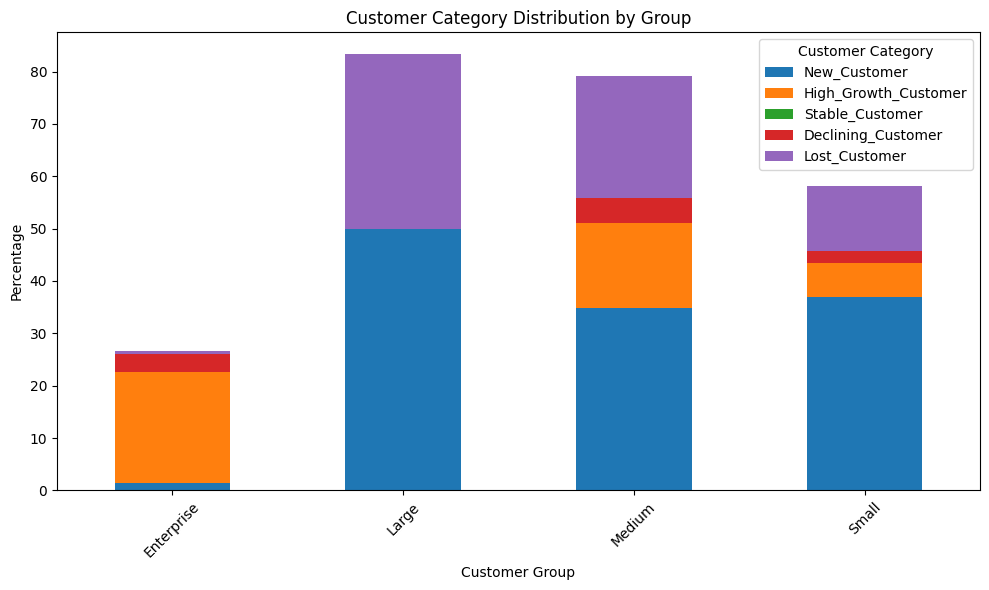

Customer Group: Enterprise
New Customer: 1.43%
High Growth Customer: 21.12%
Stable Customer: 0.00%
Declining Customer: 3.52%
Lost Customer: 0.48%

Customer Group: Large
New Customer: 50.00%
High Growth Customer: 0.00%
Stable Customer: 0.00%
Declining Customer: 0.00%
Lost Customer: 33.33%

Customer Group: Medium
New Customer: 34.88%
High Growth Customer: 16.28%
Stable Customer: 0.00%
Declining Customer: 4.65%
Lost Customer: 23.26%

Customer Group: Small
New Customer: 36.95%
High Growth Customer: 6.43%
Stable Customer: 0.00%
Declining Customer: 2.41%
Lost Customer: 12.45%



In [14]:
# Load the dataset
df = pd.read_csv("customer_analysis.csv")

# Define customer groups and categories
customer_groups = ['Enterprise', 'Large', 'Medium', 'Small']
customer_categories = ['New_Customer', 'High_Growth_Customer', 'Stable_Customer', 'Declining_Customer', 'Lost_Customer']

# Initialize dictionary to store percentages
percentages = {group: {category: 0 for category in customer_categories} for group in customer_groups}

# Calculate percentages for each category in each customer group
for group in customer_groups:
    group_data = df[df['Customer_Group'] == group]
    group_size = len(group_data)
    for category in customer_categories:
        category_sum = group_data[category].sum()
        percentage = (category_sum / group_size) * 100 if group_size != 0 else 0
        percentages[group][category] = percentage

# Convert percentages dictionary to DataFrame
percentages_df = pd.DataFrame(percentages)

# Plot stacked bar chart
percentages_df.T.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Customer Category Distribution by Group')
plt.xlabel('Customer Group')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Customer Category')
plt.tight_layout()
plt.show()

# Print percentages
for group in customer_groups:
    print(f"Customer Group: {group}")
    for category in customer_categories:
        print(f"{category.replace('_', ' ').title()}: {percentages[group][category]:.2f}%")
    print()


# **Code explanation**
* **percentages_df = pd.DataFrame(percentages):** This line converts the percentages dictionary into a DataFrame for easier manipulation and visualization.
* **percentages_df.T.plot(kind='bar', stacked=True, figsize=(10, 6)):** This line plots the DataFrame as a stacked bar chart, transposing it to have customer groups on the x-axis.
Various formatting options are applied to the plot, such as title, labels, rotation, and legend.

###  (4). What percent of 2019 customers in each group did we lose during the COVID observation period?

Percentage of COVID observation period customers lost in Enterprise: 0.40%
Percentage of COVID observation period customers lost in Large: 33.33%
Percentage of COVID observation period customers lost in Medium: 37.14%
Percentage of COVID observation period customers lost in Small: 38.59%


<ipython-input-15-10b734a15ba5>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_data['Growth_Category'] = pd.cut(ISGR_covid, bins=[float('-inf'), 0, float('inf')], labels=['Low Growth', 'High Growth'])


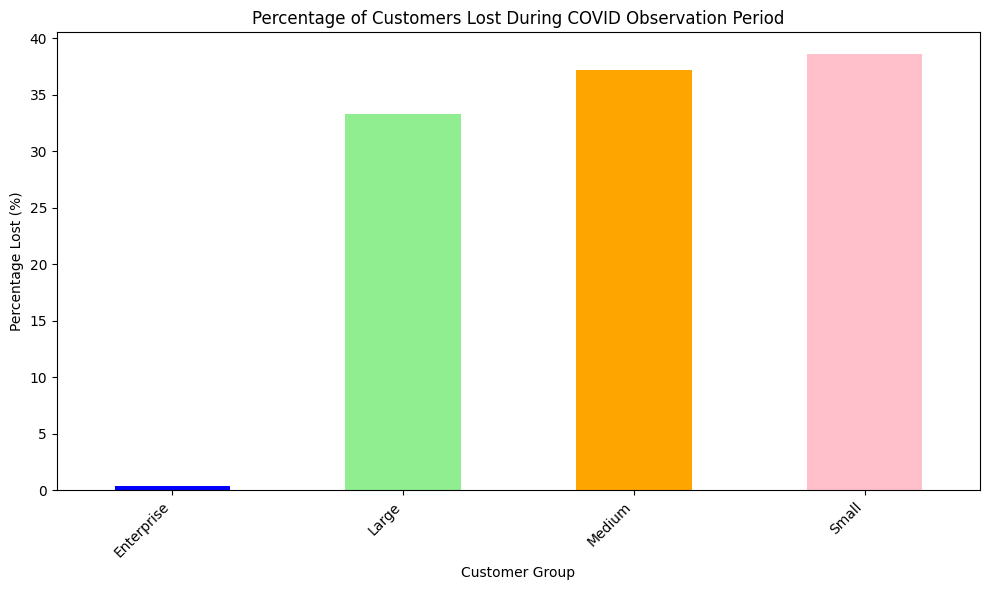

In [15]:
df = pd.read_csv("COVID_Parcel_Business_with_Growth.csv")

# Filter the data for the COVID observation period (Weeks 11 to 53 of 2020)
covid_data = df[(df['THE_YEAR'] == 2020) & (df['THE_WEEK'].between(11, 53))]

# Calculate the total parcel volume for each customer during the COVID observation period
total_volume_covid = covid_data.groupby('FakeCustomerID')['VOLUME'].sum()

# Compute ISGR for each customer during the COVID observation period
total_volume_2019 = df[(df['THE_YEAR'] == 2019) & (df['THE_WEEK'].between(1, 15))].groupby('FakeCustomerID')['VOLUME'].sum()
ISGR_covid = ((total_volume_covid - total_volume_2019) / total_volume_2019) * 100

# Classify customers as "High Growth" or "Low Growth" during the COVID observation period
covid_data['Growth_Category'] = pd.cut(ISGR_covid, bins=[float('-inf'), 0, float('inf')], labels=['Low Growth', 'High Growth'])

# Group customers by their growth category for the COVID observation period
customers_covid_grouped = covid_data.groupby(['Customer_Group', 'FakeCustomerID'])['Growth_Category'].max()

# Count the number of customers in each group for the COVID observation period
customer_count_covid = customers_covid_grouped.groupby('Customer_Group').size()

# Find the customers lost during the COVID observation period
lost_customers_covid = customers_covid_grouped.reset_index().merge(df[(df['THE_YEAR'] == 2019)][['Customer_Group', 'FakeCustomerID']], on=['Customer_Group', 'FakeCustomerID'], how='left', indicator=True).query('_merge == "left_only"').groupby('Customer_Group').size()

# Calculate the percentage of lost customers for each group during the COVID observation period
percentage_lost_customers_covid = (lost_customers_covid / customer_count_covid) * 100

# Print the percentage of lost customers for each group during the COVID observation period
for group, percentage in percentage_lost_customers_covid.items():
    print("Percentage of COVID observation period customers lost in {}: {:.2f}%".format(group, percentage))

# Define colors for each group
colors = ['blue', 'lightgreen', 'orange', 'pink', 'lightblue']

# Plot the percentage of lost customers for each group during the COVID observation period
plt.figure(figsize=(10, 6))
percentage_lost_customers_covid.plot(kind='bar', color=colors)
plt.title('Percentage of Customers Lost During COVID Observation Period')
plt.xlabel('Customer Group')
plt.ylabel('Percentage Lost (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# **Code explanation**
* **covid_data:** This line filters the DataFrame df to include only records from weeks 11 to 53 of 2020.
* **total_volume_covid:** This line calculates the total parcel volume for each customer during the COVID observation period.
* **total_volume_2019:** This line calculates the total parcel volume for each customer during the same period in 2019.
* **ISGR_covid:** This line calculates the Incremental Sales Growth Rate (ISGR) for each customer during the COVID observation period.
* **covid_data['Growth_Category']:**This line categorizes customers into "High Growth" or "Low Growth" based on their ISGR during the COVID observation period.
* **lost_customers_covid:**This line finds the customers lost during the COVID observation period by comparing the customer list from 2019 with the list of customers during the COVID observation period.
* **percentage_lost_customers_covid:** This line calculates the percentage of lost customers for each customer group during the COVID observation period.

### (4). What was the overall impact of COVID on volumes and revenue by customer group?

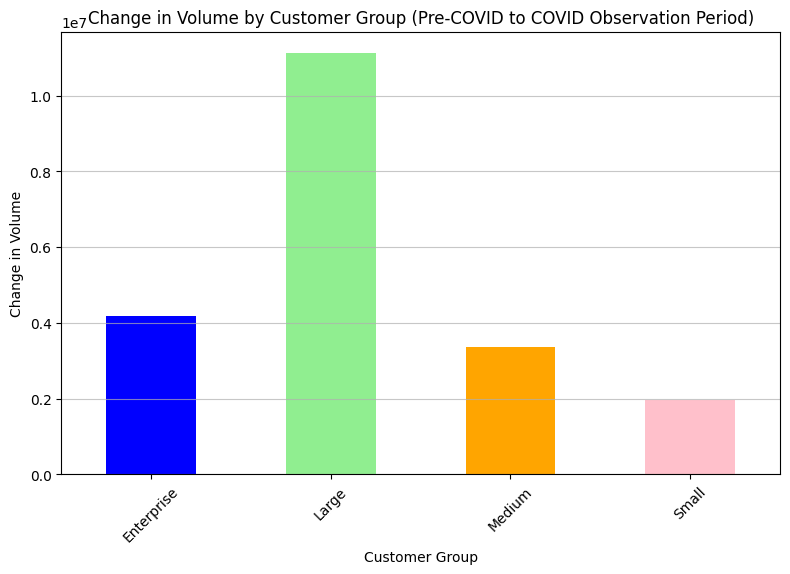

In [16]:
# Define the pre-COVID period and COVID observation period
pre_covid_period = df[(df['THE_YEAR'] == 2019) & (df['THE_WEEK'] >= 1)]
covid_observation_period = df[(df['THE_YEAR'] == 2020) & (df['THE_WEEK'] <= 53)]

# Calculate total volumes for each period and customer group
pre_covid_volume_by_group = pre_covid_period.groupby('Customer_Group')['VOLUME'].sum()
covid_volume_by_group = covid_observation_period.groupby('Customer_Group')['VOLUME'].sum()

# Calculate changes in volumes
volume_change_by_group = covid_volume_by_group - pre_covid_volume_by_group

# Visualize the impact
colors = ['blue', 'lightgreen', 'orange', 'pink', 'lightblue']
plt.figure(figsize=(8, 6))
volume_change_by_group.plot(kind='bar', color=colors)
plt.title('Change in Volume by Customer Group (Pre-COVID to COVID Observation Period)')
plt.xlabel('Customer Group')
plt.ylabel('Change in Volume')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.tight_layout()
plt.show()


# Dicount the customer based on the conditions

In [17]:
# Define conditions and corresponding discount rates for each customer group
conditions = {
    'Enterprise': {'min_volume': 500000, 'discount_rate': 0.22},
    'Large': {'min_volume': 200000, 'max_volume': 500000, 'discount_rate': 0.17},
    'Medium': {'min_volume': 10000, 'max_volume': 200000, 'discount_rate': 0.10},
    'Small': {'min_volume': 1000, 'max_volume': 10000, 'discount_rate': 0.04}
}

# Calculate volumes for each year
volumes_2018 = df[df['THE_YEAR'] == 2018].groupby('Customer_Group')['VOLUME'].sum()
volumes_2019 = df[df['THE_YEAR'] == 2019].groupby('Customer_Group')['VOLUME'].sum()
volumes_2020 = df[df['THE_YEAR'] == 2020].groupby('Customer_Group')['VOLUME'].sum()
volumes_2021 = df[df['THE_YEAR'] == 2021].groupby('Customer_Group')['VOLUME'].sum()

# Define function to apply discounts
def apply_discount(row):
    customer_group = row['Customer_Group']
    volume_2018 = volumes_2018.get(customer_group, 0)
    volume_2019 = volumes_2019.get(customer_group, 0)
    volume_2020 = volumes_2020.get(customer_group, 0)
    volume_2021 = volumes_2021.get(customer_group, 0)

    if row['THE_YEAR'] == 2020 or row['THE_YEAR'] == 2021:
        for group, condition in conditions.items():
            min_volume = condition.get('min_volume', None)
            max_volume = condition.get('max_volume', None)
            discount_rate = condition['discount_rate']
            volume = volume_2019  # Using 2019 volume for comparison

            if min_volume is not None and volume >= min_volume:
                if max_volume is None or (max_volume is not None and volume <= max_volume):
                    return row['VOLUME'] * discount_rate
    return 0

# Apply discounts to eligible customers
df['Discount'] = df.apply(apply_discount, axis=1)

# Display the dataframe with discounts applied
print(df[['FakeCustomerID', 'THE_YEAR', 'THE_WEEK', 'VOLUME', 'Customer_Group', 'Discount']])


        FakeCustomerID  THE_YEAR  THE_WEEK  VOLUME Customer_Group  Discount
0               718117      2021         1       8     Enterprise      1.76
1               718117      2020         7     257     Enterprise     56.54
2               718117      2019        39     141     Enterprise      0.00
3               718117      2018         1      14     Enterprise      0.00
4               718117      2021         2     192     Enterprise     42.24
...                ...       ...       ...     ...            ...       ...
190714          228893      2019        13      30     Enterprise      0.00
190715          228893      2019        38     122     Enterprise      0.00
190716          228893      2019        48      99     Enterprise      0.00
190717          228893      2019        20      61     Enterprise      0.00
190718          228893      2019        19      56     Enterprise      0.00

[190719 rows x 6 columns]


# **Code explanation**
* **apply_discount:** This function takes a row of the DataFrame as input and calculates the discount to be applied based on the conditions defined earlier.
* It retrieves the volumes for the customer group from each year.
* If the year is 2020 or 2021, it checks if the volume in 2019 meets the conditions specified for the customer group. If it does, it calculates and returns the discount based on the discount rate for that group.
* If the conditions are not met, it returns 0.
* **df['Discount'] = df.apply(apply_discount, axis=1):**This line applies the **'apply_discount'** function to each row of the DataFrame df along the rows (axis=1) and stores the calculated discounts in a new 'Discount' column.